In [1]:
import matplotlib.pylab as pl
%matplotlib inline
import minpy.numpy as np
from scipy.stats import norm as gaussian

In [28]:
X = np.random.normal(0, 1, (10000, 3072))
# D = [3072, 1024, 512, 256, 128, 64, 16]
D = (3072,) + (1024,) * 6
weights = [np.random.normal(0, 1 / float(D[0]) ** 0.5, (D[0], D[1]))]
weights += \
    [np.random.normal(0, 1 / (0.5 * float(D[i])) ** 0.5, (D[i], D[i + 1])) for i in range(1, len(D) - 1)]

In [23]:
activations = { 'ReLU' : lambda inputs : np.maximum(0, inputs) }

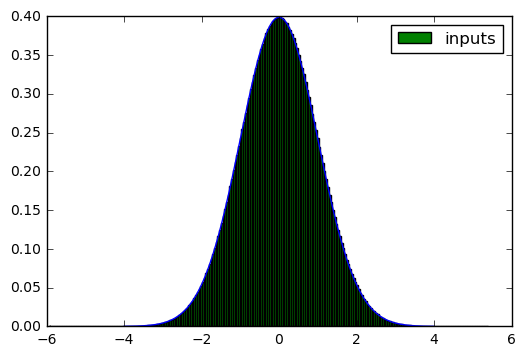

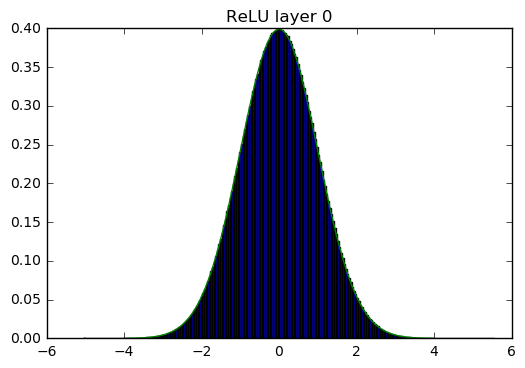

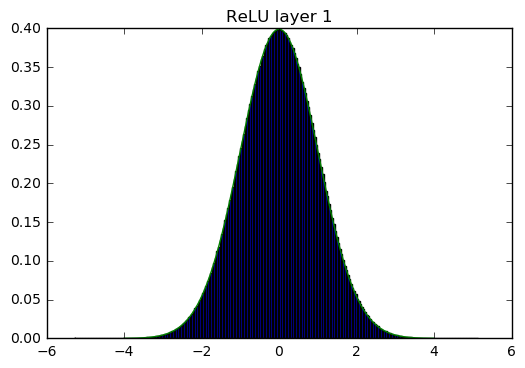

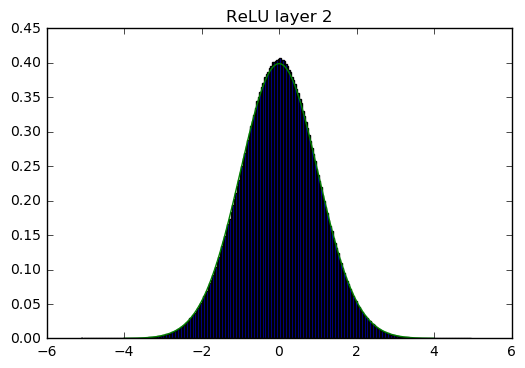

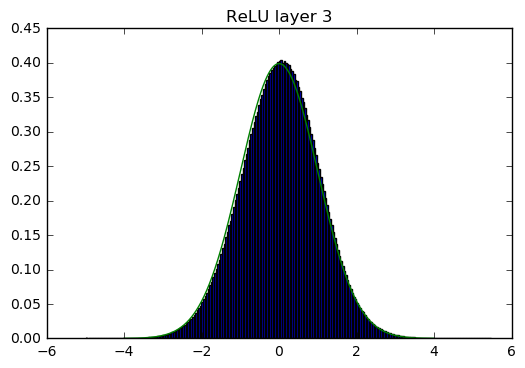

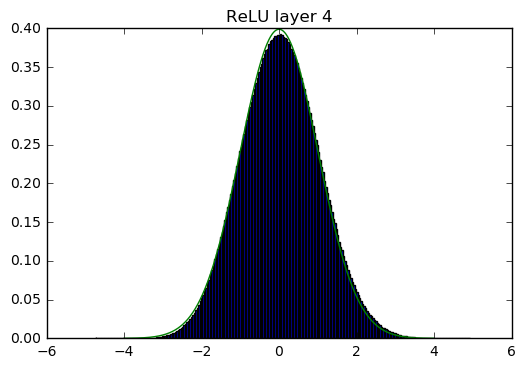

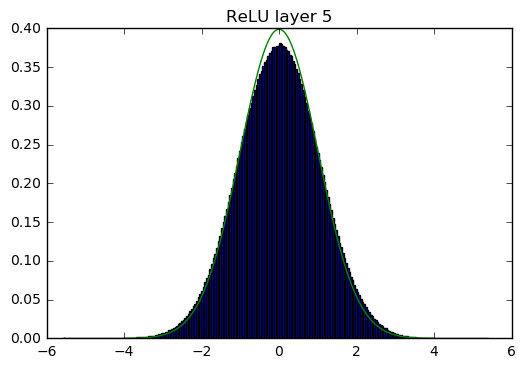

In [29]:
BINS = 256
linespace = np.linspace(-4, 4, 1000).asnumpy()

for key, value in activations.items():
    inputs = X
    pl.plot(linespace, gaussian.pdf(linespace))
    pl.hist(inputs.asnumpy().flatten(), bins=BINS, normed=True, label='inputs')
    pl.legend()
    for index, W in enumerate(weights):
        inputs = np.dot(inputs, W)
        
        # pre-activation
        pl.figure()
        pl.title('%s layer %d' % (key, index))
        pl.hist(inputs.asnumpy().flatten(), bins=BINS, normed=True)
        pl.plot(linespace, gaussian.pdf(linespace))
        
        inputs = value(inputs)